# Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Loading the Dataset

In [2]:
df = pd.read_excel('Bank dataset 1.xlsx')
df.head()

,duration,Subscription
0,117,no
1,274,yes
2,167,no
3,686,yes
4,157,no


In [3]:
data = df.copy()

# Mapping the Data 

In [4]:
data['Subscription '] = data['Subscription '].map({'yes':1, 'no':0})
data.head()

,duration,Subscription
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0


# Check the descriptive statistics

In [5]:
data.describe()

,duration,Subscription
count,99.000000,99.000000
mean,296.505051,0.494949
std,260.099211,0.502519
min,17.000000,0.000000
25%,129.000000,0.000000
50%,217.000000,0.000000
75%,339.000000,1.000000
max,1447.000000,1.000000


# Declare The Dependent Variable And Independent

In [6]:
y = data['Subscription ']
x1 = data['duration']

# Simple Logistic Regression
Run the regression and visualize it on a scatter plot (no need to plot the line).

In [7]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.581771
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Subscription    No. Observations:                   99
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.1606
Time:                        19:02:02   Log-Likelihood:                -57.595
converged:                       True   LL-Null:                       -68.617
Covariance Type:            nonrobust   LLR p-value:                 2.667e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4439      0.419     -3.445      0.001      -2.265      -0.623
duration       0.0054      0.002      3.544      0.000       0.002       0.008
==============================================================================
"""

# Plot The Scatter Plot

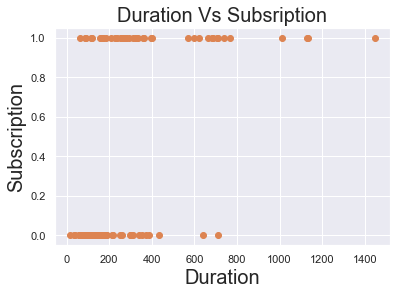

In [8]:
plt.scatter(x1,y,color = 'C1')
plt.title("Duration Vs Subsription",fontsize = 20)
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

In [9]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [10]:
results_log.predict()

array([0.31, 0.51, 0.37, 0.90, 0.35, 0.32, 0.27, 0.21, 0.91, 0.39, 0.64,
       0.28, 0.37, 0.47, 0.43, 0.57, 0.36, 0.31, 0.59, 0.88, 0.89, 0.67,
       0.54, 0.48, 0.53, 0.25, 0.50, 0.50, 0.67, 0.32, 0.22, 0.32, 0.90,
       0.52, 0.36, 0.40, 0.99, 0.27, 1.00, 0.71, 0.32, 0.58, 0.38, 0.34,
       0.35, 0.30, 0.24, 0.37, 0.37, 0.56, 0.92, 0.25, 0.27, 0.35, 0.32,
       0.58, 0.34, 0.25, 0.93, 0.62, 0.29, 0.30, 0.94, 0.48, 0.60, 0.54,
       0.34, 0.37, 0.92, 0.29, 0.23, 0.45, 0.56, 0.46, 0.63, 0.33, 0.49,
       0.66, 0.36, 0.26, 0.42, 0.52, 0.37, 0.54, 0.49, 0.98, 0.37, 0.61,
       0.48, 0.28, 0.43, 0.27, 0.45, 0.39, 0.84, 0.87, 0.86, 0.24, 0.99])

In the given column the answers are 'Yes' and 'No' and after we mapping to '0' and '1' so the predicted values will in '0'th column and '1'st column

In [11]:
np.array(data['Subscription '])
results_log.pred_table()

array([[39.00, 11.00],
       [21.00, 28.00]])

In [12]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,39.0,11.0
Actual 1,21.0,28.0


# Test The Accuracy

In [13]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.6767676767676768